In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [2]:
pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n-seg.pt')

#image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
#result = model.predict(image, conf=0.25)[0]

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.90M/5.90M [00:00<00:00, 56.9MB/s]


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
#result.boxes.xyxy

In [ ]:
#result.boxes.conf

In [ ]:
#result.boxes.cls

In [ ]:
#result.masks.data

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [ ]:
#import supervision as sv

#detections = sv.Detections.from_ultralytics(result)

In [ ]:
#mask_annotator = sv.MaskAnnotator()
#label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

#annotated_image = image.copy()
#annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
#annotated_image = label_annotator.annotate(annotated_image, detections=detections)

#sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("diploma-wdwcx").project("defects-no_defects")
version = project.version(2)
dataset = version.download("yolov11")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to defects+no_defects-2 in yolov11:: 100%|██████████| 8132/8132 [00:06<00:00, 1200.40it/s]


In [ ]:
#for custom data.yaml file
#!wget -O /kaggle/working/datasets/defect+no_defects-1/data.yaml 'https://drive.usercontent.google.com/download?id=143Gk1wII63rgTozALFcxYz0r3KpiU6sW'

## Custom Training

In [ ]:
#import os
#os.remove("/kaggle/working/datasets/defects+no_defects-2/train/labels.cache")

In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolo11n-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=512 plots=True

/content
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/datasets/defects+no_defects-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

In [7]:
from google.colab import files

!zip -r /content/segment-yolo11n.zip /content/runs/segment
files.download('/content/segment-yolo11n.zip')

  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/train/ (stored 0%)
  adding: content/runs/segment/train/confusion_matrix.png (deflated 38%)
  adding: content/runs/segment/train/val_batch1_labels.jpg (deflated 11%)
  adding: content/runs/segment/train/train_batch18631.jpg (deflated 12%)
  adding: content/runs/segment/train/val_batch0_labels.jpg (deflated 9%)
  adding: content/runs/segment/train/BoxR_curve.png (deflated 20%)
  adding: content/runs/segment/train/weights/ (stored 0%)
  adding: content/runs/segment/train/weights/best.pt (deflated 10%)
  adding: content/runs/segment/train/weights/last.pt (deflated 10%)
  adding: content/runs/segment/train/train_batch2.jpg (deflated 7%)
  adding: content/runs/segment/train/args.yaml (deflated 53%)
  adding: content/runs/segment/train/results.png (deflated 6%)
  adding: content/runs/segment/train/events.out.tfevents.1741307105.e7f666027153.1484.0 (deflated 88%)
  adding: content/runs/segment/train/confusion_matrix_no

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
HOME

'/content'

In [8]:
HOME = '/content/drive/MyDrive'

In [15]:
!ls {HOME}/'runs-100-yolov11n-defect-nodefects/segment/train'

args.yaml					    MaskF1_curve.png	  train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	  train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	  val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	  val_batch0_pred.jpg
BoxR_curve.png					    results.csv		  val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		  val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	  val_batch2_labels.jpg
events.out.tfevents.1741307105.e7f666027153.1484.0  train_batch18630.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch18631.jpg  weights
labels.jpg					    train_batch18632.jpg


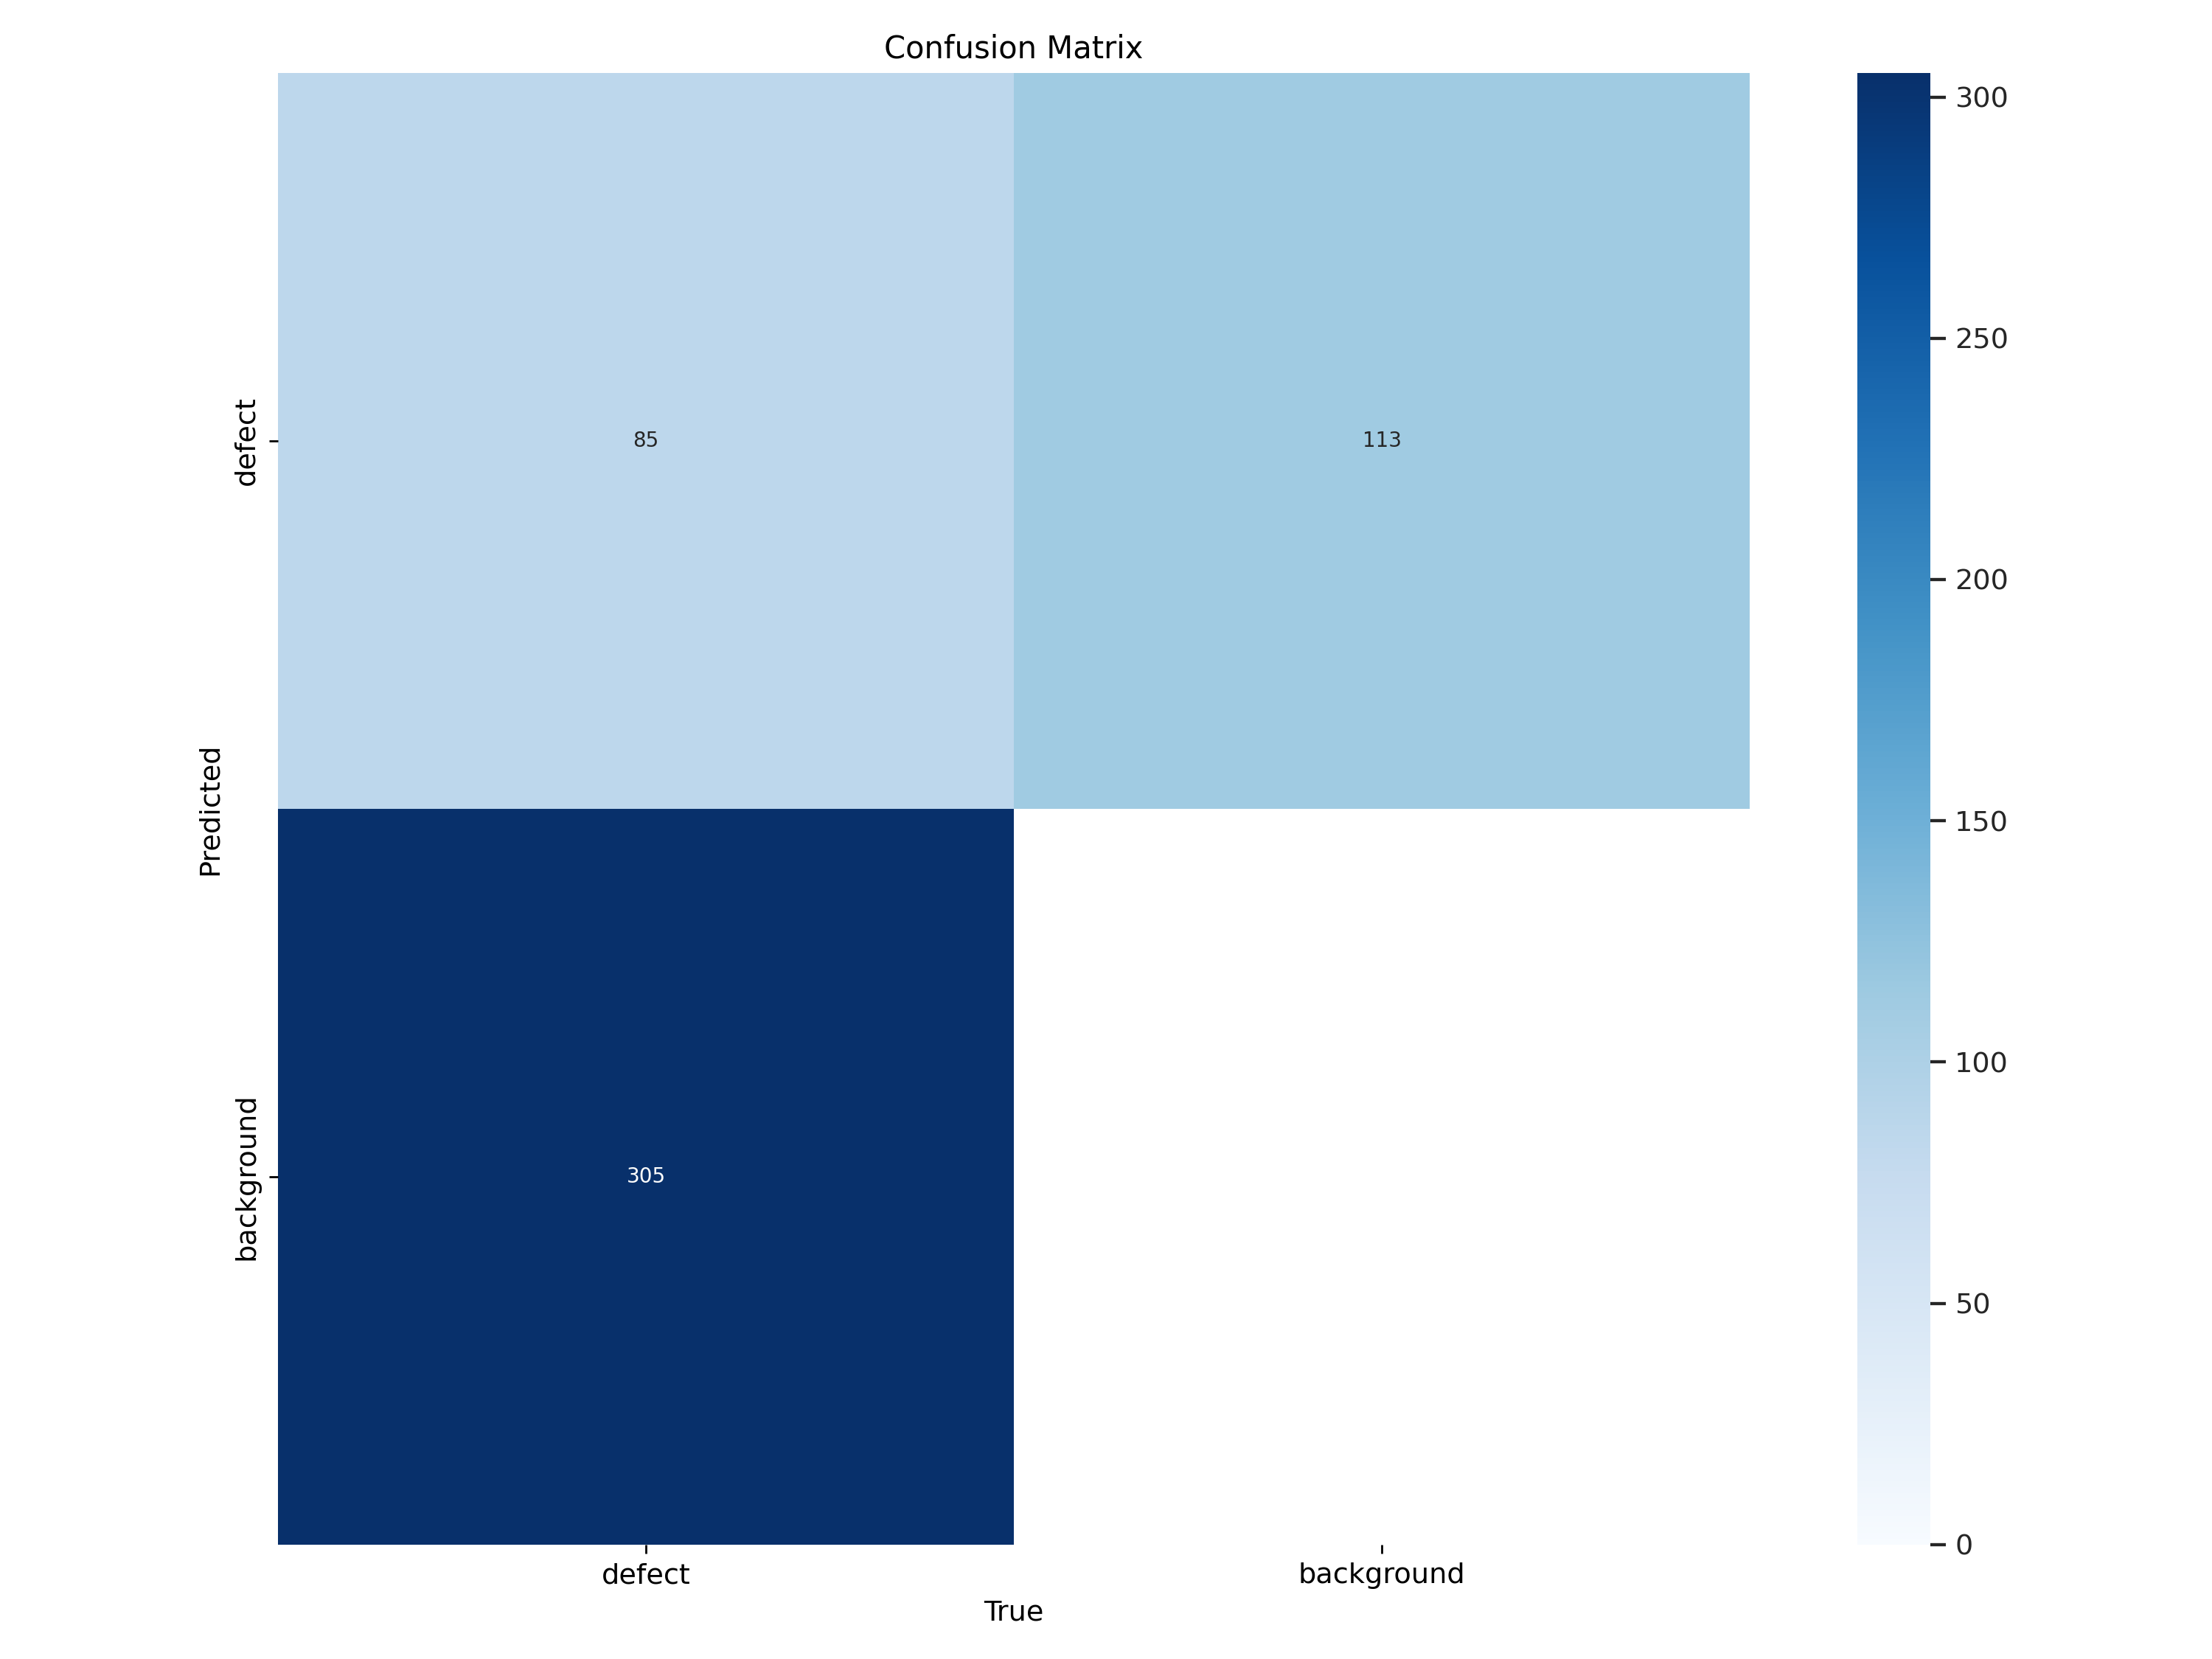

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs-100-yolov11n-defect-nodefects/segment/train/confusion_matrix.png', width=600)

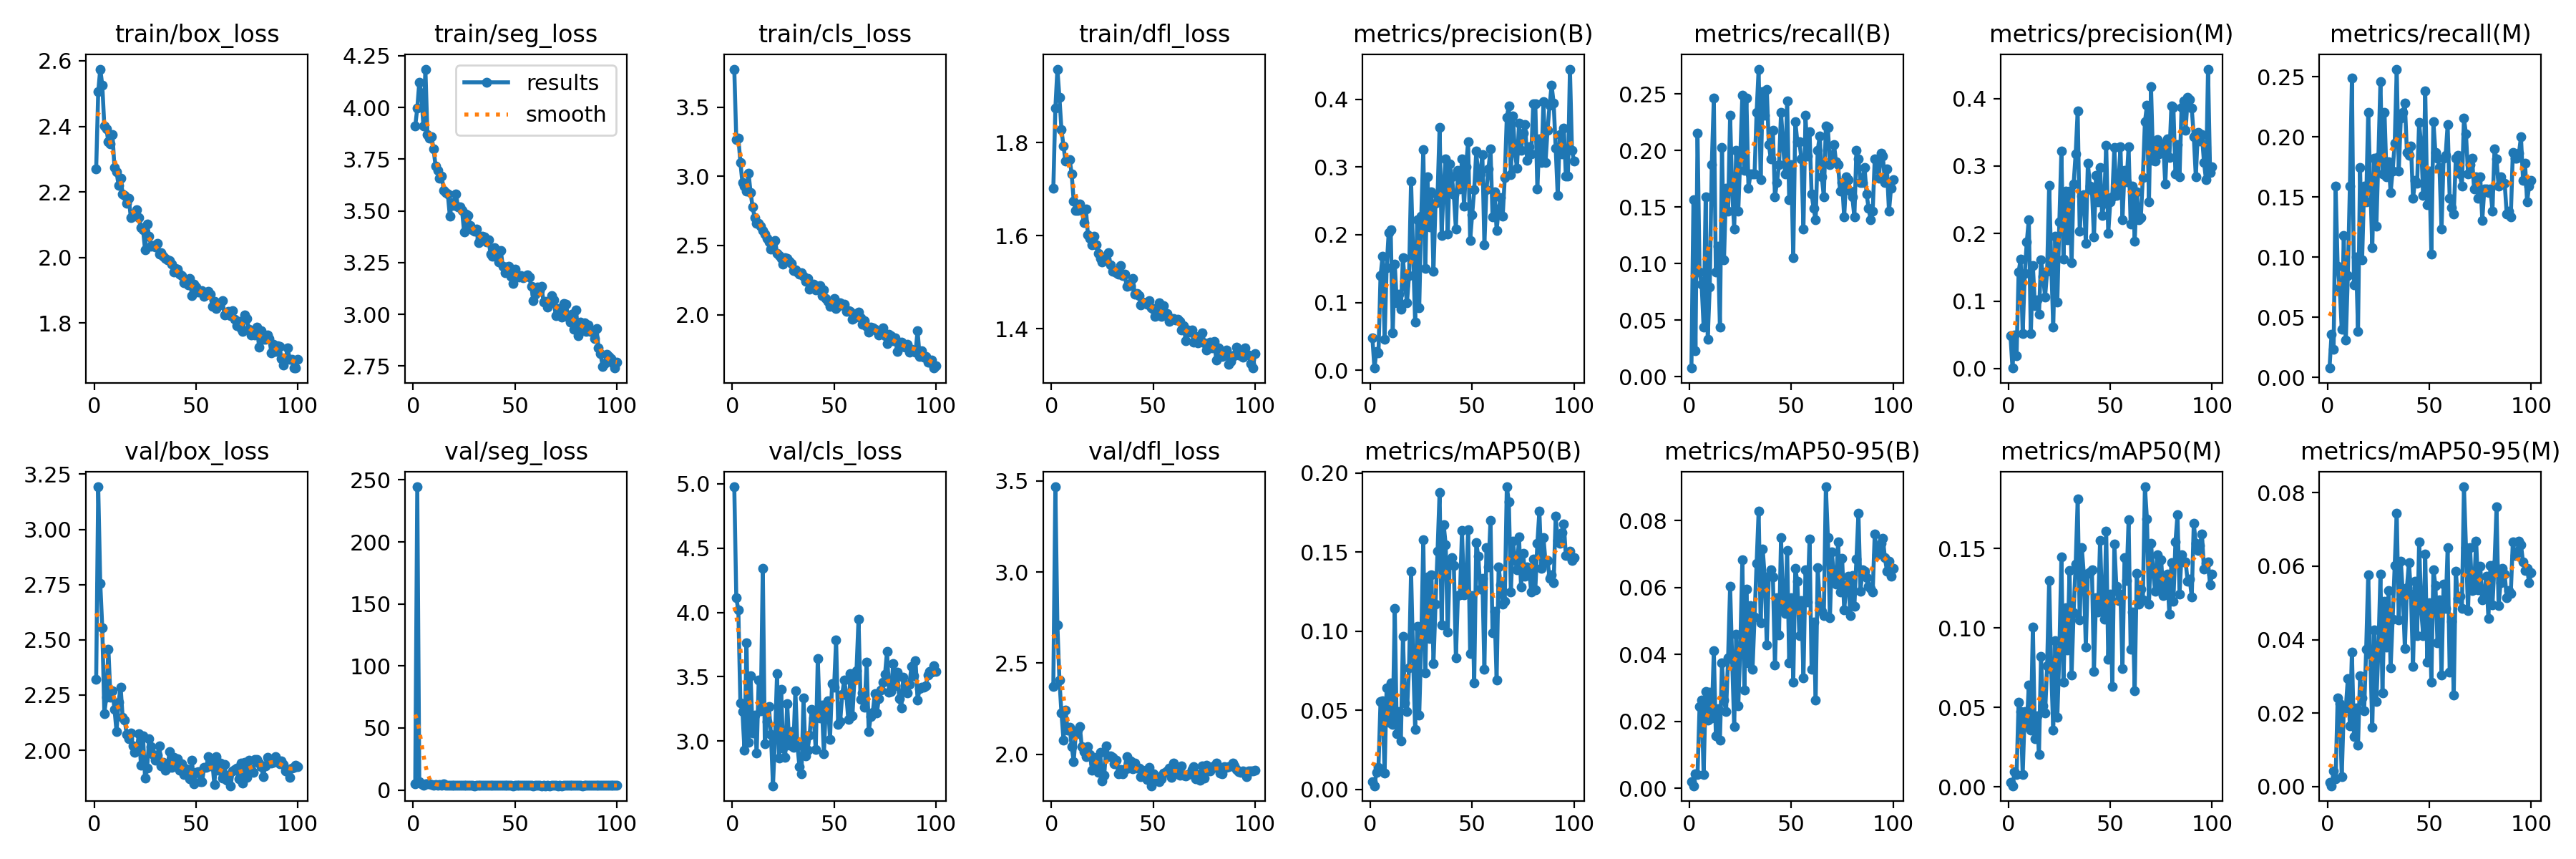

In [17]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs-100-yolov11n-defect-nodefects/segment/train/results.png', width=600)

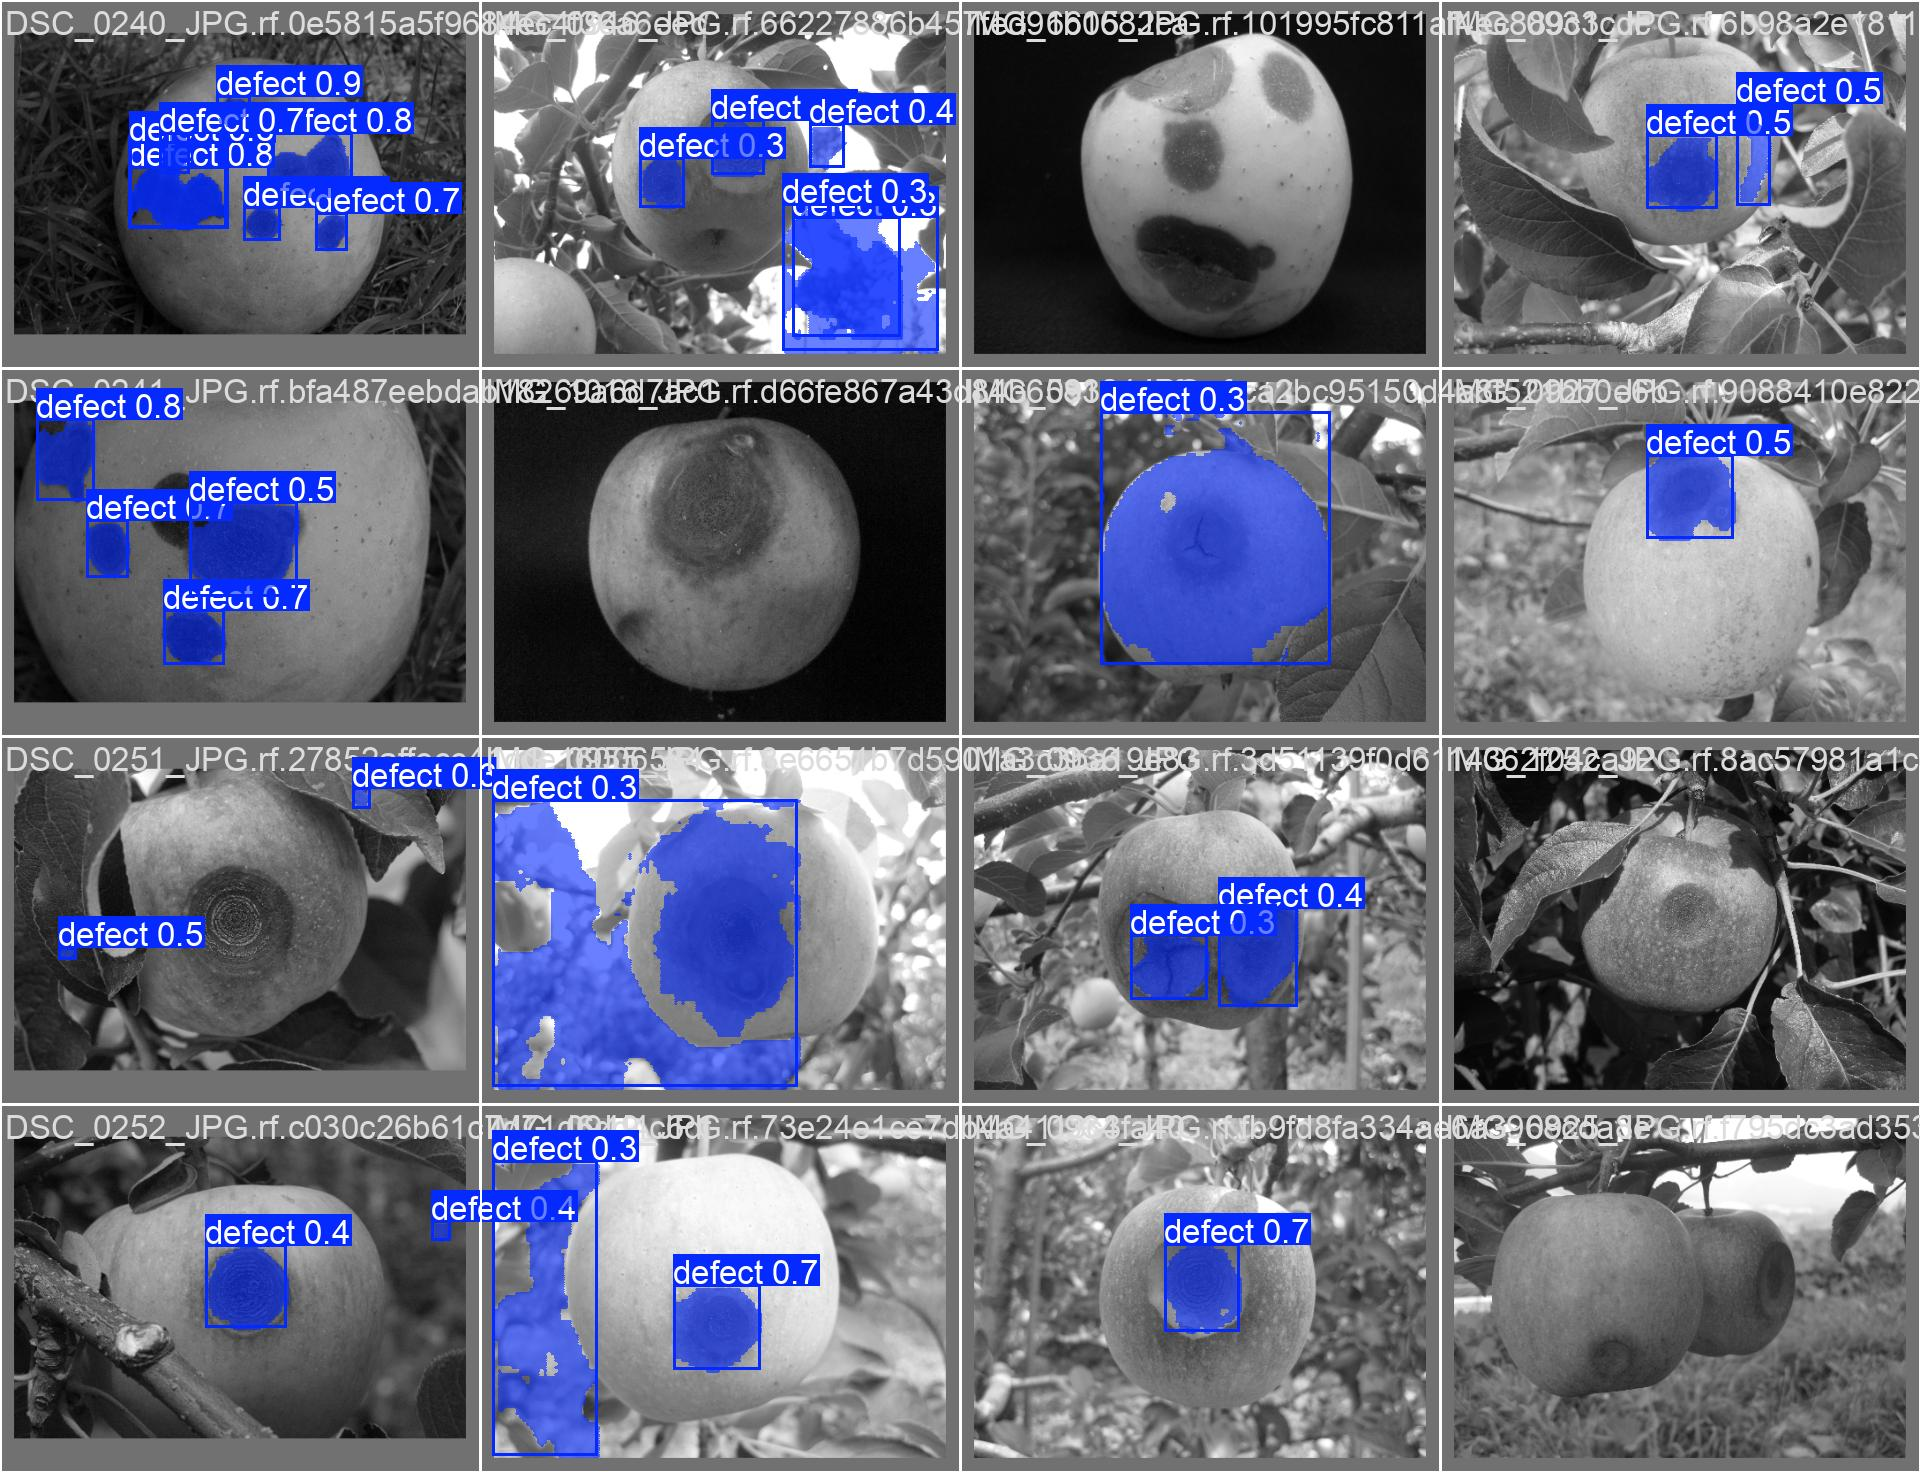

In [18]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs-100-yolov11n-defect-nodefects/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [19]:
HOME

'/content/drive/MyDrive'

In [20]:
dataset.location

'/content/datasets/defects+no_defects-2'

In [21]:
!yolo task=segment mode=val model={HOME}/runs-100-yolov11n-defect-nodefects/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs
100% 755k/755k [00:00<00:00, 14.5MB/s]
val: Scanning /content/datasets/defects+no_defects-2/valid/labels... 205 images, 0 backgrounds, 0 corrupt: 100% 205/205 [00:00<00:00, 1088.29it/s]
val: New cache created: /content/datasets/defects+no_defects-2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 13/13 [01:02<00:00,  4.80s/it]
                   all        205        390      0.373      0.221      0.192     0.0902      0.365      0.215      0.189     0.0821
Speed: 2.7ms preprocess, 251.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [22]:
rf = Roboflow(api_key="cX1rdJf4GtEpwoOEtXLD")
project = rf.workspace("diploma-wdwcx").project("products_sam-2")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to products_sam-2-2 in yolov11:: 100%|██████████| 2797/2797 [00:00<00:00, 2798.65it/s]


In [23]:
!yolo task=segment mode=predict model={HOME}/runs-100-yolov11n-defect-nodefects/segment/train/weights/best.pt conf=0.25 source={'/content/datasets/products_sam-2-2'}/test/images save=True save_txt = True

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs

image 1/277 /content/datasets/products_sam-2-2/test/images/00000_jpg.rf.acad1f9a9007f159a9afe375e545e7e8.jpg: 384x512 9 defects, 196.1ms
image 2/277 /content/datasets/products_sam-2-2/test/images/00002_jpg.rf.5e78073ad36eb58ea919f264f333c541.jpg: 352x512 4 defects, 148.7ms
image 3/277 /content/datasets/products_sam-2-2/test/images/00004_jpg.rf.0a243a95b405c8ea8c9c0959c610182b.jpg: 352x512 4 defects, 130.5ms
image 4/277 /content/datasets/products_sam-2-2/test/images/00005_jpg.rf.2922cd2900b5dba944d585e337ae1c42.jpg: 384x512 6 defects, 150.7ms
image 5/277 /content/datasets/products_sam-2-2/test/images/00010_jpg.rf.744f28e4431a6ee6e4f5aa83dffa52b2.jpg: 352x512 4 defects, 133.0ms
image 6/277 /content/datasets/products_sam-2-2/test/images/00011_jpg.rf.9abb19ed0e0865a24a4151ab4825d93f.jpg: 352x512 1 defect, 133.2ms
image 7/277

**NOTE:** Let's take a look at few results.

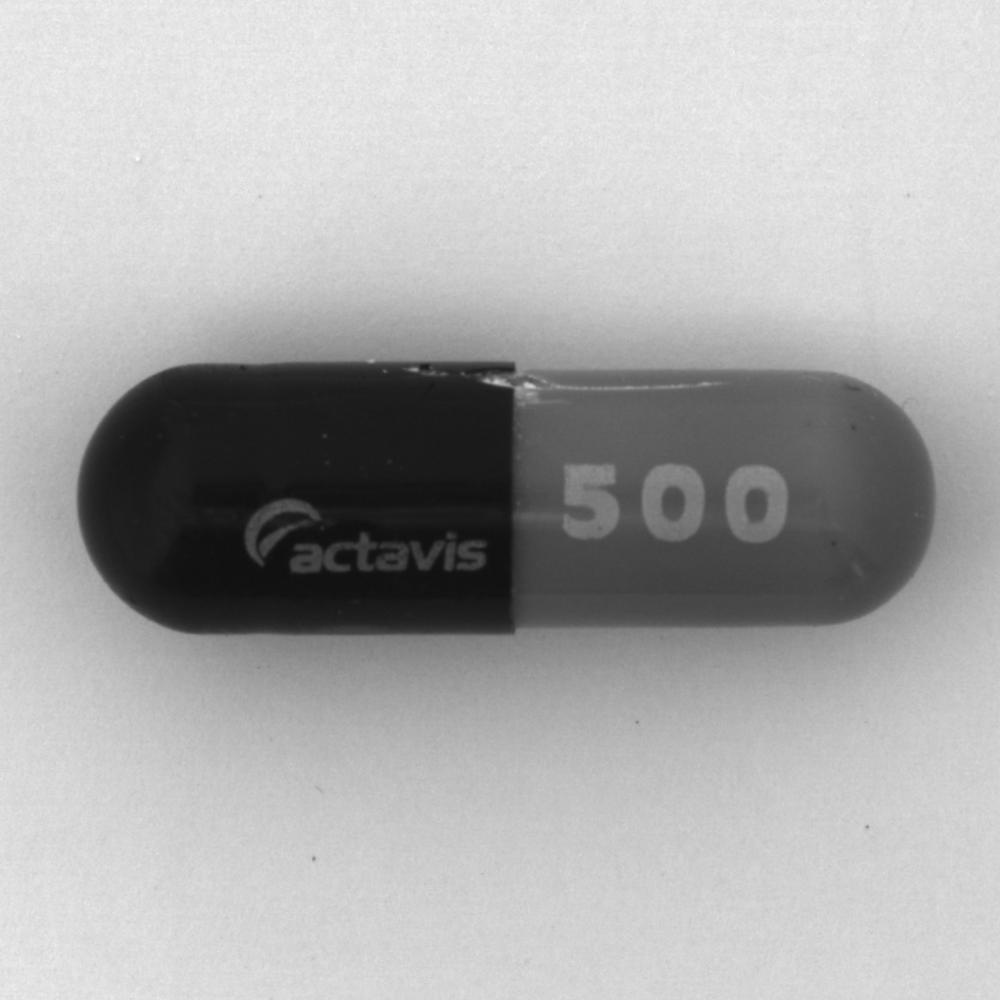

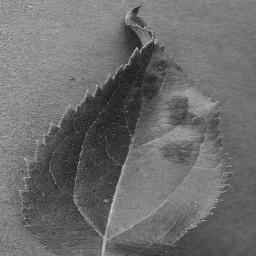

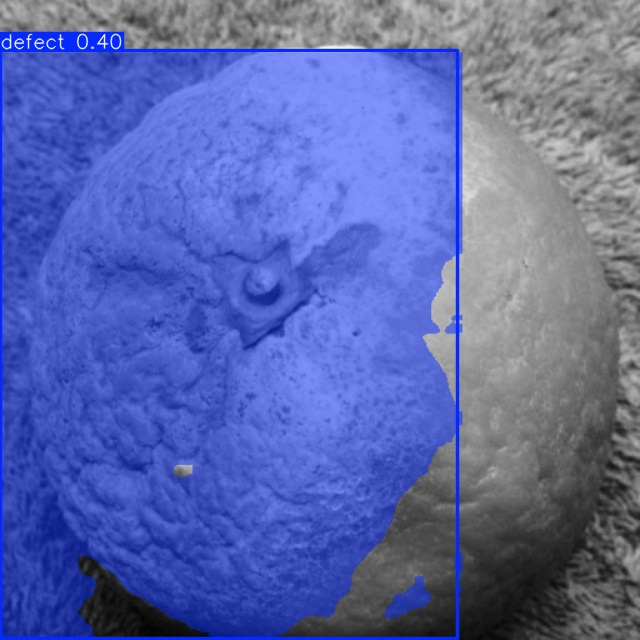

In [24]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'/content/datasets/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [25]:
!ls runs/segment/predict

00000_jpg.rf.acad1f9a9007f159a9afe375e545e7e8.jpg
00002_jpg.rf.5e78073ad36eb58ea919f264f333c541.jpg
00004_jpg.rf.0a243a95b405c8ea8c9c0959c610182b.jpg
00005_jpg.rf.2922cd2900b5dba944d585e337ae1c42.jpg
00010_jpg.rf.744f28e4431a6ee6e4f5aa83dffa52b2.jpg
00011_jpg.rf.9abb19ed0e0865a24a4151ab4825d93f.jpg
00016_jpg.rf.2354fb811bbf9dd6081e4d42298d31b2.jpg
00017_jpg.rf.1914ab0d4da6a5b6e8aff0d1e5e68487.jpg
00026_jpg.rf.35e069b919ff876b9b7fcb4b9c708496.jpg
00027_jpg.rf.cbf2b4a8cb0fc7c855559f65383a5ba7.jpg
00028_jpg.rf.605979a55edcd57f785c54f30ff320e5.jpg
00031_jpg.rf.5b8b072ca631dd60024d621f7801186f.jpg
00036_jpg.rf.bbd572970b30c67c4a0d84a857973c5a.jpg
00043_jpg.rf.c0f332d749296951c53e22657424c72a.jpg
00049_jpg.rf.a69dabe0f1dc89dc81a77d24ad2d1d3b.jpg
00054_jpg.rf.6e3b55d2fe13c44489a9ea1ce48e4433.jpg
00058_jpg.rf.9b29b5301261026a418a43e7b2e31a9e.jpg
00064_jpg.rf.23a8bba35e96b81be04df3292dde2c65.jpg
00071_jpg.rf.f91511d5571a7bd890d9d97562863be1.jpg
00074_jpg.rf.03303d2f88becaf1b746f3363218e1b3.jpg


In [26]:
# mAP через YOLO встроенную функцию
!yolo task=segment mode=val model={HOME}/runs-100-yolov11n-defect-nodefects/segment/train/weights/best.pt data=/content/datasets/products_sam-2-2/data.yaml plots=True

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs
val: Scanning /content/datasets/products_sam-2-2/valid/labels... 277 images, 0 backgrounds, 0 corrupt: 100% 277/277 [00:00<00:00, 1068.47it/s]
val: New cache created: /content/datasets/products_sam-2-2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 18/18 [01:28<00:00,  4.90s/it]
                   all        277       1528      0.403       0.31      0.281      0.127      0.394      0.287      0.255      0.103
Speed: 6.1ms preprocess, 264.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
from google.colab import files


In [31]:
!zip -r /content/runs-100-yolov11n-defect-nodefects.zip /content/datasets/runs/segment
files.download('/content/runs-100-yolov11n-defect-nodefects.zip')

updating: content/datasets/runs/segment/ (stored 0%)
updating: content/datasets/runs/segment/val2/ (stored 0%)
updating: content/datasets/runs/segment/val2/BoxF1_curve.png (deflated 22%)
updating: content/datasets/runs/segment/val2/MaskPR_curve.png (deflated 18%)
updating: content/datasets/runs/segment/val2/MaskF1_curve.png (deflated 22%)
updating: content/datasets/runs/segment/val2/val_batch2_labels.jpg (deflated 8%)
updating: content/datasets/runs/segment/val2/confusion_matrix_normalized.png (deflated 37%)
updating: content/datasets/runs/segment/val2/BoxP_curve.png (deflated 17%)
updating: content/datasets/runs/segment/val2/val_batch2_pred.jpg (deflated 8%)
updating: content/datasets/runs/segment/val2/val_batch1_pred.jpg (deflated 8%)
updating: content/datasets/runs/segment/val2/val_batch0_labels.jpg (deflated 8%)
updating: content/datasets/runs/segment/val2/MaskP_curve.png (deflated 16%)
updating: content/datasets/runs/segment/val2/val_batch0_pred.jpg (deflated 9%)
updating: content

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>